In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib import transforms
from matplotlib import font_manager

# Register the font
font_path = '/usr/share/fonts/liberation-sans/LiberationSans-Regular.ttf'
font_manager.fontManager.addfont(font_path)

# Get the actual family name (it must match the internal font name)
liberation = font_manager.FontProperties(fname=font_path)
font_name = liberation.get_name()  # usually "Liberation Sans"
print(font_name)

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
# Set it globally
plt.rcParams['font.family'] = font_name
plt.rcParams['font.sans-serif'] = [font_name]

plt.rcParams.update({
    'axes.linewidth': 0.5,      # axes spines
    'xtick.direction': 'in',
    'ytick.direction': 'in',
    'xtick.major.width': 0.5,
    'ytick.major.width': 0.5,
    'xtick.minor.width': 0.3,
    'ytick.minor.width': 0.3,
})

Liberation Sans


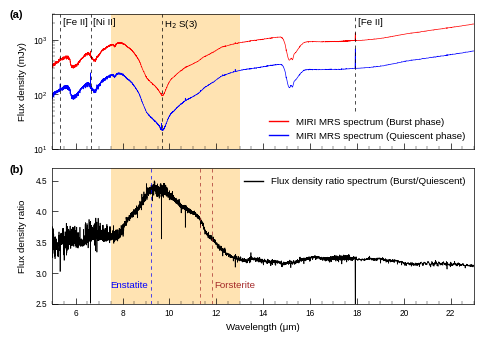

In [13]:
wv_obs, flux_B = np.genfromtxt('EC53_B_MIRI_aperture.txt', unpack=True, skip_header=1, delimiter=',')
wv_obs, flux_Q = np.genfromtxt('EC53_Q_MIRI_aperture.txt', unpack=True, skip_header=1, delimiter=',')

flux_B *= 1000
flux_Q *= 1000

fig, axs = plt.subplots(2, 1, figsize=(12/2.54, 12/2.54 * 0.7), constrained_layout=True, sharex=True)

axs[0].plot(wv_obs, flux_B, c='r', label='MIRI MRS spectrum (Burst phase)', lw=0.5)
axs[0].plot(wv_obs, flux_Q, c='b', label='MIRI MRS spectrum (Quiescent phase)', lw=0.5)

axs[0].set_yscale('log')
axs[0].set_xlim(5.0, 23)
axs[0].set_ylabel('Flux density (mJy)', fontsize=7)
axs[0].set_ylim(10, 3e3)

leg = axs[0].legend(loc='lower right', fontsize=7, frameon=False)
for line in leg.get_lines():
    line.set_linewidth(1)

axs[0].axvline(5.3401, c='k', lw=0.5, ls=(0, (5, 5)))
axs[0].axvline(9.6649, c='k', lw=0.5, ls=(0, (5, 5)))

axs[0].axvline(6.6360, c='k', lw=0.5, ls=(0, (5, 5)))
#axs[0].axvline(17.936, c='k', lw=0.5, ls=(0, (5, 5)))
axs[0].plot([17.936, 17.936], [50, 3e3], c='k', lw=0.5, ls=(0, (5, 5)))

transform = transforms.blended_transform_factory(axs[0].transData, axs[0].transAxes)
axs[0].text(5.3401+0.1, 0.97, '[Fe II]', fontsize=7, ha='left', va='top', color='k', transform=transform)
axs[0].text(6.6360+0.1, 0.97, '[Ni II]', fontsize=7, ha='left', va='top', color='k', transform=transform)
axs[0].text(9.6649+0.1, 0.97, r'H$_2$ S(3)', fontsize=7, ha='left', va='top', color='k', transform=transform)
axs[0].text(17.936+0.1, 0.97, '[Fe II]', fontsize=7, ha='left', va='top', color='k', transform=transform)


axs[1].plot(wv_obs, flux_B/flux_Q, c='k', lw=0.5, label='Flux density ratio spectrum (Burst/Quiescent)')

axs[1].set_ylabel('Flux density ratio', fontsize=7)
axs[1].set_xlabel('Wavelength (μm)', fontsize=7)
axs[1].set_ylim(2.5, 4.7)

leg = axs[1].legend(loc='upper right', fontsize=7, frameon=False)
for line in leg.get_lines():
    line.set_linewidth(1)

transform = transforms.blended_transform_factory(axs[1].transData, axs[1].transAxes)
axs[1].axvline(9.2, c='b', lw=0.5, ls=(0, (5, 5)))
axs[1].axvline(11.3, c='brown', lw=0.5, ls=(0, (5, 5)))
axs[1].axvline(11.8, c='brown', lw=0.5, ls=(0, (5, 5)))
axs[1].text(9.2-0.1, 0.1, 'Enstatite', fontsize=7, ha='right', va='bottom', color='b', transform=transform)
axs[1].text(11.8+0.1, 0.1, 'Forsterite', fontsize=7, ha='left', va='bottom', color='brown', transform=transform)

for ax in axs:
    ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.5))
    ax.tick_params(axis='both', which='major', labelsize=6, length=4)
    ax.tick_params(axis='both', which='minor', length=2)
    ax.fill_between([7.5, 13], 0, 1, transform=ax.get_xaxis_transform(), color='orange', alpha=0.3, ec=None)

    for spine in ax.spines.values():
        spine.set_linewidth(0.5)

axs[1].yaxis.set_major_locator(ticker.MultipleLocator(0.5))

axs[0].text(-0.10, 1.03, '(a)', transform=axs[0].transAxes, fontsize=8, fontweight='bold', va='top', ha='left')
axs[1].text(-0.10, 1.03, '(b)', transform=axs[1].transAxes, fontsize=8, fontweight='bold', va='top', ha='left')

fig.align_ylabels(axs)

fig.set_size_inches(12/2.54, 12/2.54 * 0.7)
plt.savefig('Final_Fig1.pdf', bbox_inches=None)